<a href="https://colab.research.google.com/github/ashiksanyo10/deepFace_demo/blob/main/deepface.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install deepface -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 6.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 5.8 MB/s eta 0:00:00


In [2]:
from deepface import DeepFace
import cv2
import pandas as pd
from google.colab.patches import cv2_imshow

Directory  /root /.deepface created
Directory  /root /.deepface/weights created


In [5]:
out1 = DeepFace.verify("/content/taylor1.png" , "/content/taylor2.png")

vgg_face_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/vgg_face_weights.h5
To: /root/.deepface/weights/vgg_face_weights.h5
100%|██████████| 580M/580M [00:02<00:00, 260MB/s]


In [7]:
out2 = DeepFace.verify("/content/taylor1.png" , "/content/selena.png")

In [8]:
out1

{'verified': True,
 'distance': 0.26955301939100484,
 'threshold': 0.4,
 'model': 'VGG-Face',
 'detector_backend': 'opencv',
 'similarity_metric': 'cosine',
 'facial_areas': {'img1': {'x': 83, 'y': 163, 'w': 394, 'h': 394},
  'img2': {'x': 151, 'y': 187, 'w': 428, 'h': 428}},
 'time': 9.57}

In [9]:
x , y , w , h = out1["facial_areas"]["img1"].values()

In [10]:
x , y , w , h

(83, 163, 394, 394)

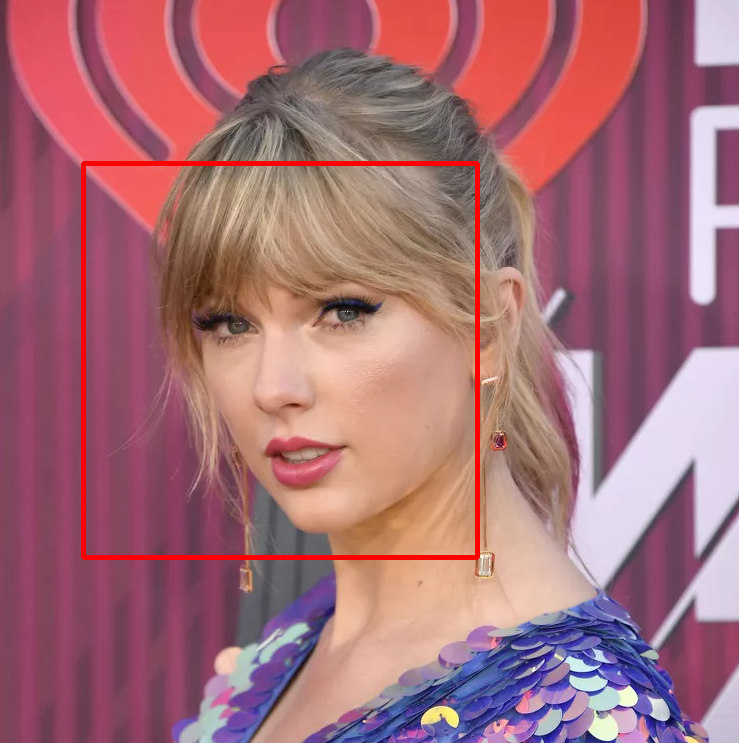

In [12]:
ig = cv2.imread("/content/taylor1.png")
ig = cv2.rectangle(ig , (x , y) , (x + w , y + h) , (0 , 0 , 255) , 3)
cv2_imshow(ig)

In [14]:
out3 = DeepFace.find("/content/taylor1.png" , "/content/Database")

Finding representations: 100%|██████████| 3/3 [00:03<00:00,  1.08s/it]


Representations stored in /content/Database/representations_vgg_face.pkl file.Please delete this file when you add new identities in your database.
find function lasts  5.148441553115845  seconds


In [17]:
out3[0]

,identity,source_x,source_y,source_w,source_h,VGG-Face_cosine
0,/content/Database/taylor3.png,83,163,394,394,0.24406


# A lower cosine similarity score suggests a higher similarity between the detected face and the reference face.